## Import Library dan Load Data

In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np

# Load CSV data from 'knn.csv'
with open('knn.csv', 'r') as file:
    reader = csv.reader(file)
    header = next(reader)
    data = list(reader)

# Convert string data to float
for i in range(len(data)):
    for j in range(len(data[i])-1):
        data[i][j] = float(data[i][j])

# Extract features and labels
X = [row[:-1] for row in data[:-1]]
y = [row[-1] for row in data[:-1]]
X_test = data[-1][:-1]

## Normalisasi Data dengan Min-Max Normalization

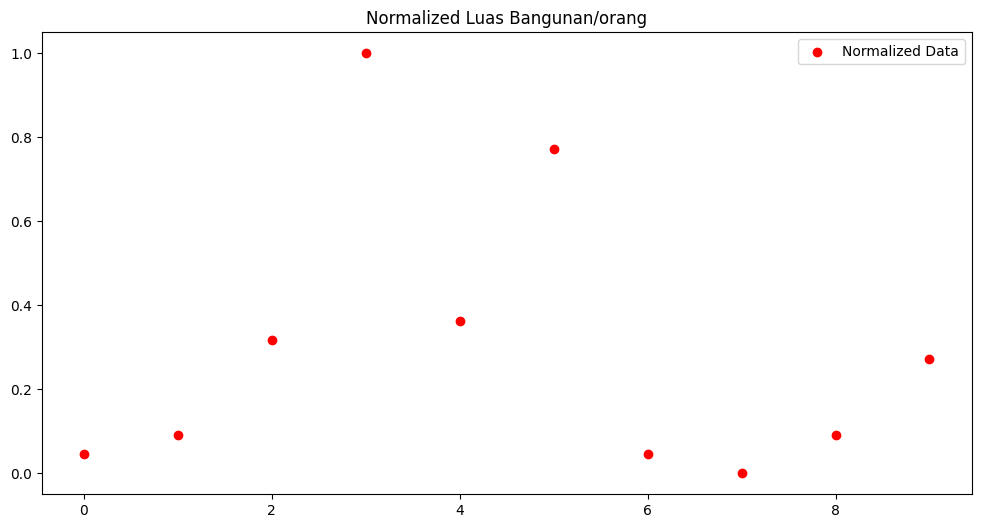

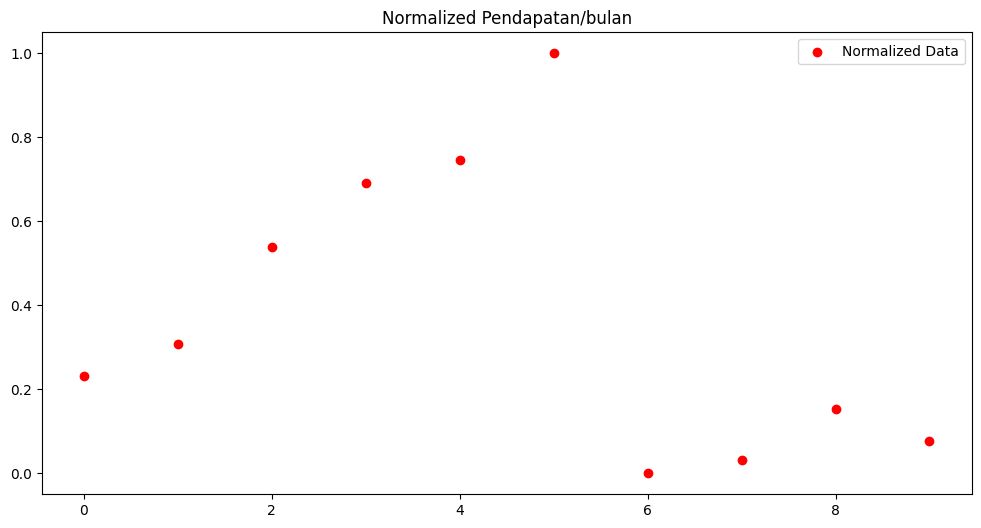

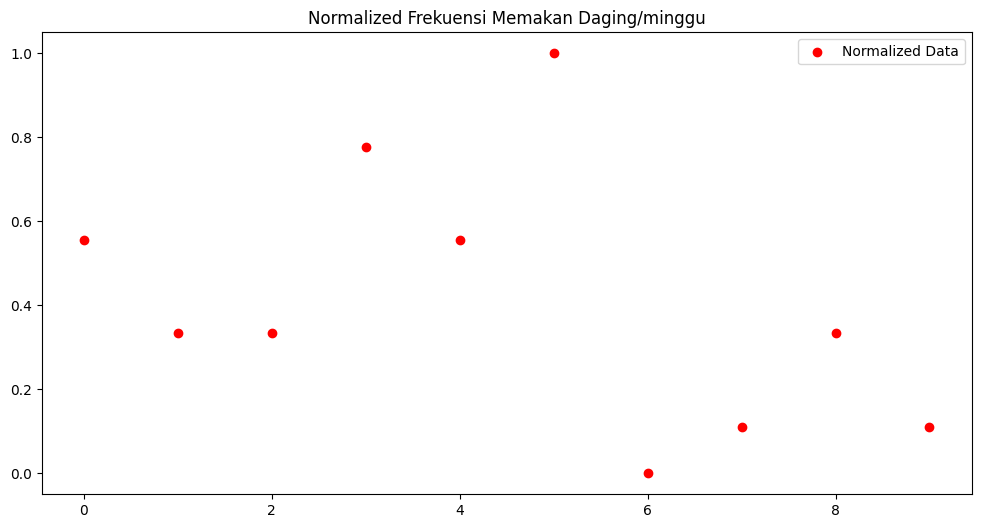

Original Data:


,Luas Bangunan/orang,Pendapatan/bulan,Frekuensi Memakan Daging/minggu
0,9.0,2000000.0,3.0
1,10.0,2500000.0,2.0
2,15.0,4000000.0,2.0
3,30.0,5000000.0,4.0
4,16.0,5350000.0,3.0
5,25.0,7000000.0,5.0
6,9.0,500000.0,0.5
7,8.0,700000.0,1.0
8,10.0,1500000.0,2.0
9,14.0,1000000.0,1.0



Normalized Data:


,Luas Bangunan/orang,Pendapatan/bulan,Frekuensi Memakan Daging/minggu
0,0.045455,0.230769,0.555556
1,0.090909,0.307692,0.333333
2,0.318182,0.538462,0.333333
3,1.000000,0.692308,0.777778
4,0.363636,0.746154,0.555556
5,0.772727,1.000000,1.000000
6,0.045455,0.000000,0.000000
7,0.000000,0.030769,0.111111
8,0.090909,0.153846,0.333333
9,0.272727,0.076923,0.111111



Difference:


,Luas Bangunan/orang,Pendapatan/bulan,Frekuensi Memakan Daging/minggu
0,8.954545,2.000000e+06,2.444444
1,9.909091,2.500000e+06,1.666667
2,14.681818,3.999999e+06,1.666667
3,29.000000,4.999999e+06,3.222222
4,15.636364,5.349999e+06,2.444444
5,24.227273,6.999999e+06,4.000000
6,8.954545,5.000000e+05,0.500000
7,8.000000,7.000000e+05,0.888889
8,9.909091,1.500000e+06,1.666667
9,13.727273,9.999999e+05,0.888889


In [4]:
import pandas as pd

# 1. Data normalization
def normalize(data):
    min_vals = np.min(data, axis=0)
    max_vals = np.max(data, axis=0)
    norm_data = (data - min_vals) / (max_vals - min_vals)
    return norm_data, min_vals, max_vals

X_normalized, min_vals, max_vals = normalize(np.array(X))

# Visualization of normalized data for each feature
features = ["Luas Bangunan/orang", "Pendapatan/bulan", "Frekuensi Memakan Daging/minggu"]

for i, feature in enumerate(features):
    plt.figure(figsize=(12, 6))
    plt.scatter(range(len(X_normalized)), X_normalized[:, i], color='red', label='Normalized Data')
    plt.title(f"Normalized {feature}")
    plt.legend()
    plt.show()

# Display the difference in a table
df_original = pd.DataFrame(X, columns=features)
df_normalized = pd.DataFrame(X_normalized, columns=features)
df_difference = df_original - df_normalized

print("Original Data:")
display(df_original)
print("\nNormalized Data:")
display(df_normalized)
print("\nDifference:")
display(df_difference)


## Menghitung Jarak Neighboor


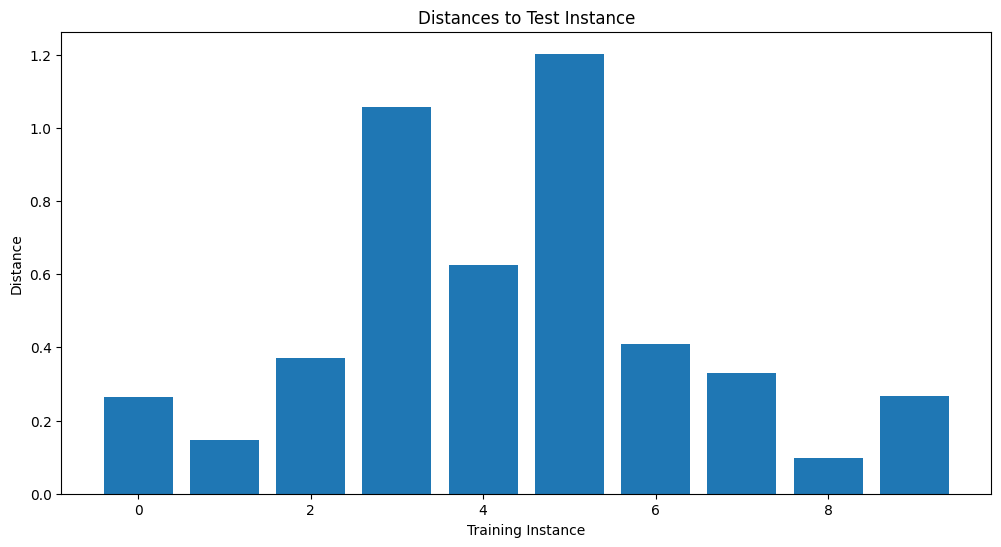

In [5]:
# 2. Distance computation
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

distances = [euclidean_distance(X_test_normalized, x) for x in X_normalized]

# Visualization of distances
plt.figure(figsize=(12, 6))
plt.bar(range(len(distances)), distances)
plt.title("Distances to Test Instance")
plt.xlabel("Training Instance")
plt.ylabel("Distance")
plt.show()

## Memilih Jarak Terbaik

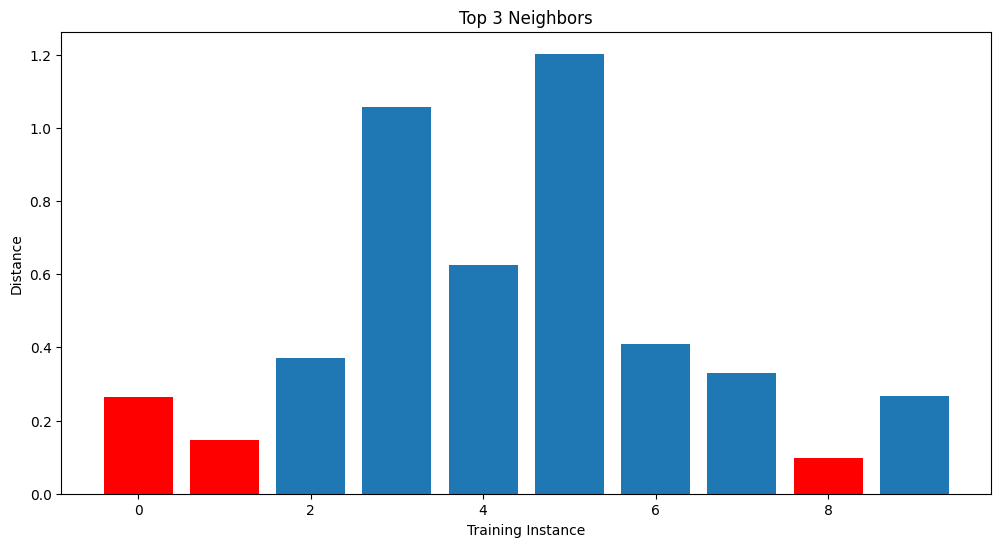

In [6]:
# 3. Sorting the distances
sorted_indices = np.argsort(distances)

# 4. Selecting the top k neighbors
k = 3
top_k_indices = sorted_indices[:k]

# Visualization of top k neighbors
plt.figure(figsize=(12, 6))
plt.bar(range(len(distances)), distances)
plt.bar(top_k_indices, np.array(distances)[top_k_indices], color='red')
plt.title(f"Top {k} Neighbors")
plt.xlabel("Training Instance")
plt.ylabel("Distance")
plt.show()

## Prediksi

In [7]:
# 5. Voting
labels = np.array(y)
top_k_labels = labels[top_k_indices]
unique_labels, counts = np.unique(top_k_labels, return_counts=True)
predicted_label = unique_labels[np.argmax(counts)]

print(f"Predicted Category for the last entry: {predicted_label}")

Predicted Category for the last entry: sedang
